In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
price_data = pd.read_csv("Daily Prices_ICCO.csv")
price_data.head()

,Date,ICCO daily price (US$/tonne)
0,27/02/2025,"9,099.66"
1,26/02/2025,"9,089.95"
2,25/02/2025,"8,668.57"
3,24/02/2025,"8,408.72"
4,21/02/2025,"9,106.42"


In [4]:
price_data["Date"] = pd.to_datetime(price_data["Date"])
price_data.rename(columns = {"ICCO daily price (US$/tonne)": "Price"},
                  inplace = True)
price_data['Price'] = price_data['Price'].str.replace(',','').astype(float)
price_data.head()

,Date,Price
0,2025-02-27,9099.66
1,2025-02-26,9089.95
2,2025-02-25,8668.57
3,2025-02-24,8408.72
4,2025-02-21,9106.42


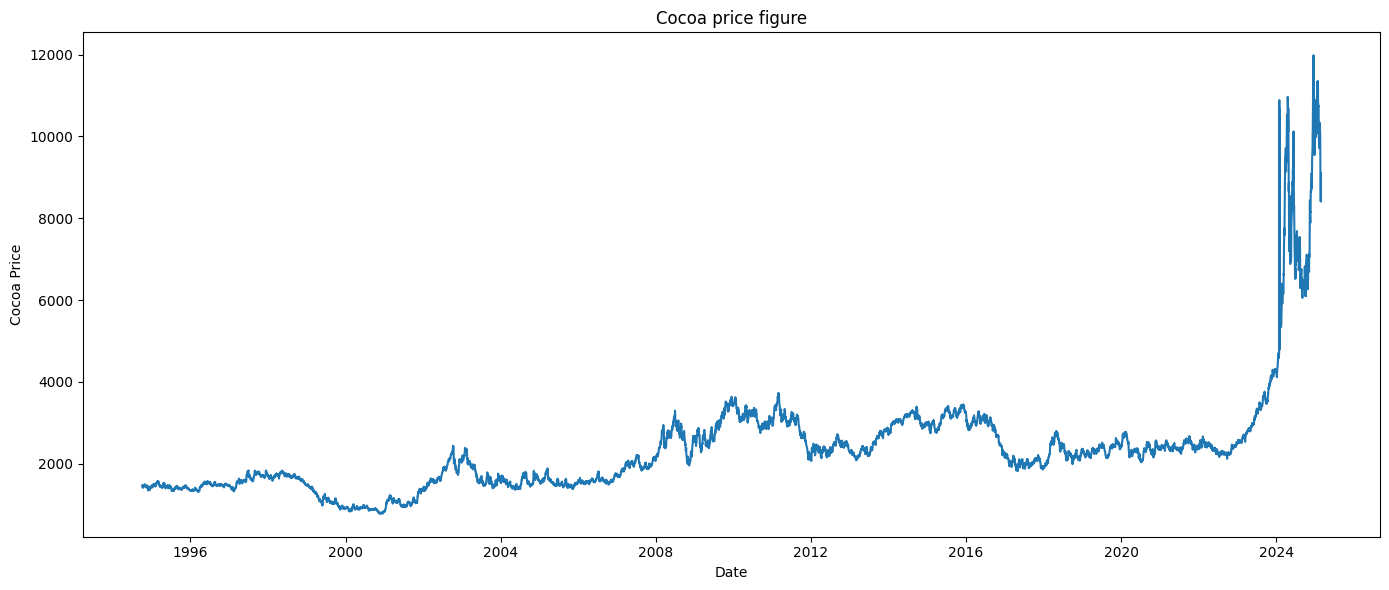

In [5]:
plt.figure(figsize = (14,6))
plt.plot(price_data['Date'], price_data['Price'])
plt.xlabel('Date')
plt.ylabel('Cocoa Price')
plt.title('Cocoa price figure')
plt.tight_layout()
plt.savefig('Cocoa price figure.png')
plt.show()

In [6]:
Ghana_data = pd.read_csv("Ghana_data.csv")
Ghana_data.head()

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,GHM00065472,"KOTOKA INTERNATIONAL, GH",1990-01-01,NaN,80,91.0,76.0
1,GHM00065472,"KOTOKA INTERNATIONAL, GH",1990-01-02,NaN,81,92.0,NaN
2,GHM00065472,"KOTOKA INTERNATIONAL, GH",1990-01-03,NaN,82,NaN,NaN
3,GHM00065472,"KOTOKA INTERNATIONAL, GH",1990-01-04,NaN,81,NaN,75.0
4,GHM00065472,"KOTOKA INTERNATIONAL, GH",1990-01-05,0.0,79,89.0,75.0


In [7]:
Ghana_data['DATE'] = pd.to_datetime(Ghana_data['DATE'])
merge_data = pd.merge(price_data, Ghana_data, left_on='Date', right_on = 'DATE',how='inner')
merge_data

,Date,Price,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,2024-11-28,8956.18,GHM00065472,"KOTOKA INTERNATIONAL, GH",2024-11-28,NaN,84,90.0,NaN
1,2024-11-28,8956.18,GHM00065442,"KUMASI, GH",2024-11-28,NaN,83,NaN,73.0
2,2024-11-28,8956.18,GHM00065453,"HO, GH",2024-11-28,NaN,85,96.0,73.0
3,2024-11-28,8956.18,GHM00065432,"WENCHI, GH",2024-11-28,NaN,80,92.0,70.0
4,2024-11-28,8956.18,GHM00065465,"AXIM, GH",2024-11-28,0.01,81,89.0,76.0
...,...,...,...,...,...,...,...,...,...
35313,1994-10-06,1430.32,GHM00065445,"SEFWI BEKWAI, GH",1994-10-06,0.00,80,NaN,NaN
35314,1994-10-05,1430.57,GHM00065472,"KOTOKA INTERNATIONAL, GH",1994-10-05,0.24,79,NaN,NaN
35315,1994-10-05,1430.57,GHM00065445,"SEFWI BEKWAI, GH",1994-10-05,NaN,82,NaN,NaN
35316,1994-10-04,1462.28,GHM00065472,"KOTOKA INTERNATIONAL, GH",1994-10-04,0.00,81,NaN,NaN


In [8]:
merge_data.drop(['DATE','STATION','NAME'], axis = 1, inplace = True)
final_data = merge_data.groupby("Date")[['Price','PRCP', 'TAVG', 'TMAX', 'TMIN']].mean().reset_index()
final_data.head(10)

,Date,Price,PRCP,TAVG,TMAX,TMIN
0,1994-10-03,1466.24,0.000000,77.000000,NaN,73.000000
1,1994-10-04,1462.28,0.000000,81.000000,NaN,NaN
2,1994-10-05,1430.57,0.240000,80.500000,NaN,NaN
3,1994-10-06,1430.32,0.005000,80.000000,NaN,73.000000
4,1994-10-07,1416.46,0.510000,78.500000,NaN,74.000000
5,1994-10-10,1413.73,0.000000,76.000000,NaN,72.000000
6,1994-10-11,1413.94,NaN,80.000000,NaN,74.000000
7,1994-10-12,1411.61,0.706667,75.666667,81.0,69.000000
8,1994-10-13,1412.38,0.000000,80.000000,NaN,NaN
9,1994-10-14,1415.50,0.295000,80.400000,86.5,71.666667


In [9]:
final_data['PRCP'].fillna(0, inplace = True)
final_data.sort_values('Date', inplace=True)
final_data.fillna(method = 'bfill', inplace = True)
final_data.head()

,Date,Price,PRCP,TAVG,TMAX,TMIN
0,1994-10-03,1466.24,0.000,77.0,81.0,73.0
1,1994-10-04,1462.28,0.000,81.0,81.0,73.0
2,1994-10-05,1430.57,0.240,80.5,81.0,73.0
3,1994-10-06,1430.32,0.005,80.0,81.0,73.0
4,1994-10-07,1416.46,0.510,78.5,81.0,74.0


In [10]:
final_data['Price_yesterday'] = final_data['Price'].shift(1)
final_data['Price_2_days_ago'] = final_data['Price'].shift(2)
final_data.dropna(inplace = True)
final_data.sort_values(by=['Date'], inplace=True)
final_data.head(10)

,Date,Price,PRCP,TAVG,TMAX,TMIN,Price_yesterday,Price_2_days_ago
2,1994-10-05,1430.57,0.240000,80.500000,81.0,73.000000,1462.28,1466.24
3,1994-10-06,1430.32,0.005000,80.000000,81.0,73.000000,1430.57,1462.28
4,1994-10-07,1416.46,0.510000,78.500000,81.0,74.000000,1430.32,1430.57
5,1994-10-10,1413.73,0.000000,76.000000,81.0,72.000000,1416.46,1430.32
6,1994-10-11,1413.94,0.000000,80.000000,81.0,74.000000,1413.73,1416.46
7,1994-10-12,1411.61,0.706667,75.666667,81.0,69.000000,1413.94,1413.73
8,1994-10-13,1412.38,0.000000,80.000000,86.5,71.666667,1411.61,1413.94
9,1994-10-14,1415.50,0.295000,80.400000,86.5,71.666667,1412.38,1411.61
10,1994-10-21,1471.46,0.043333,80.333333,89.0,72.750000,1415.50,1412.38
11,1994-10-24,1459.74,0.000000,82.000000,89.0,75.000000,1471.46,1415.50


In [11]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
features = ['PRCP', 'TAVG','TMAX','TMIN','Price_yesterday', 'Price_2_days_ago']
x = final_data[features]
y = final_data['Price']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [14]:
rf_regression = RandomForestRegressor(n_estimators = 150, random_state = 42)
rf_regression.fit(x_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [15]:
y_pred_1 = rf_regression.predict(x_test)
rf_mse = mean_squared_error(y_test, y_pred_1)
rf_rmse = np.sqrt(rf_mse)
r2_random_forest = r2_score(y_test, y_pred_1)
print(rf_mse, rf_rmse, r2_random_forest)

20952.1351840956 144.7485239444451 0.983437266610902


In [16]:
test_results_rf = x_test.copy()
test_results_rf['Actual'] = y_test
test_results_rf['Predicted'] = y_pred_1
test_results_rf['Date'] = final_data.loc[test_results_rf.index, 'Date']
test_results_rf = test_results_rf.sort_values('Date')

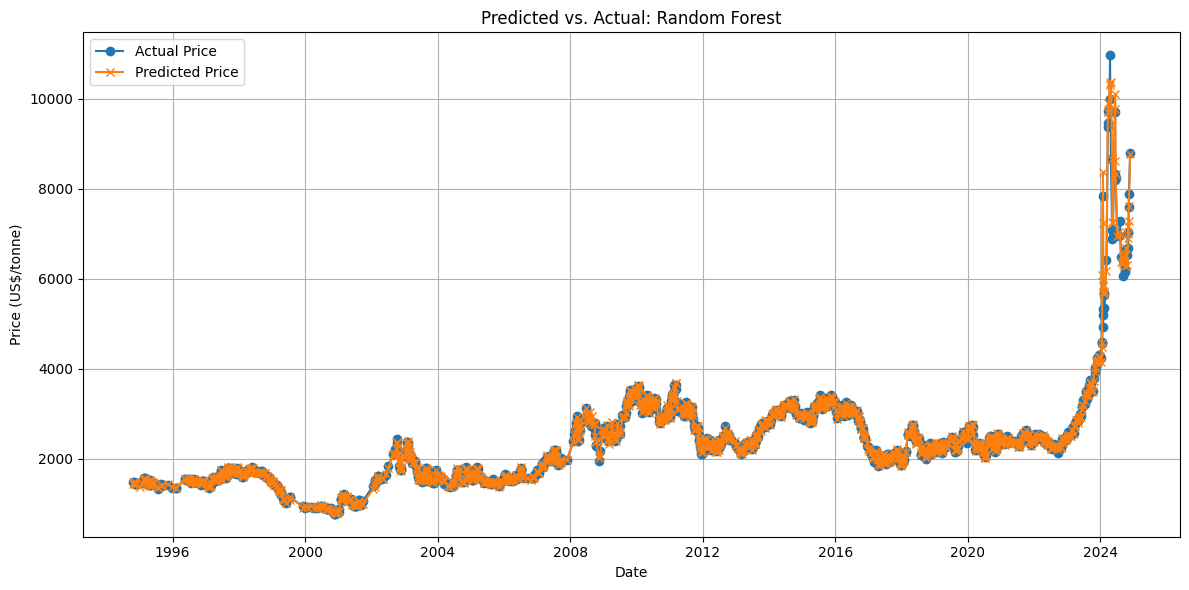

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(test_results_rf['Date'], test_results_rf['Actual'], label='Actual Price', marker='o')
plt.plot(test_results_rf['Date'], test_results_rf['Predicted'], label='Predicted Price', marker='x')
plt.title("Predicted vs. Actual: Random Forest")
plt.xlabel("Date")
plt.ylabel("Price (US$/tonne)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Predicted vs. Actual: Random Forest.png')
plt.show()

In [18]:
feature_importance = pd.DataFrame({'Feature': x_test.columns,'Importance': rf_regression.feature_importances_})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)
feature_importance

,Feature,Importance
4,Price_yesterday,0.788575
5,Price_2_days_ago,0.209158
2,TMAX,0.000702
1,TAVG,0.000627
0,PRCP,0.000495
3,TMIN,0.000442


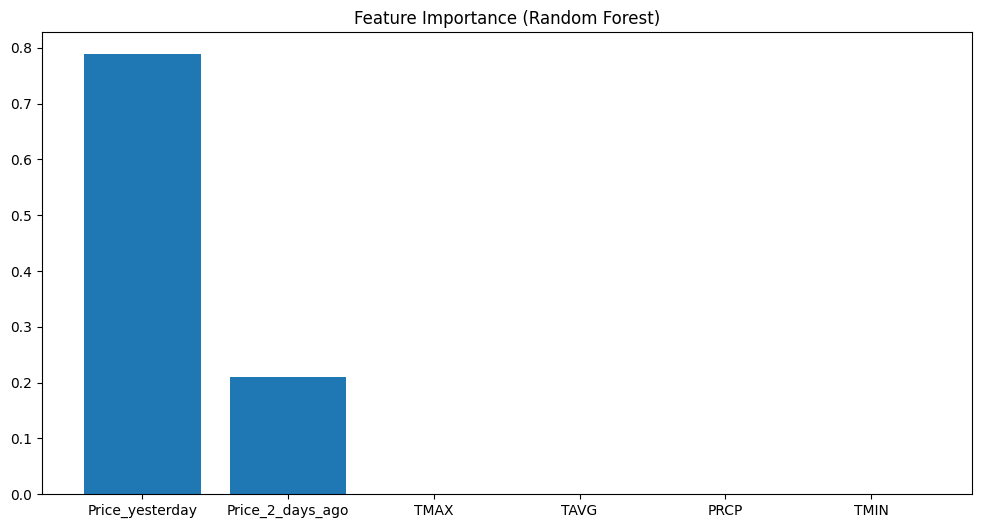

In [19]:
plt.figure(figsize = (12,6))
plt.bar(x=feature_importance['Feature'], height=feature_importance['Importance'])
plt.title('Feature Importance (Random Forest)')
plt.savefig('Feature Importance (Random Forest).png')
plt.show()

In [20]:
#Fit an linear regression model:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred_2 = linear_model.predict(x_test)
mse_linear = mean_squared_error(y_test, y_pred_2)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_2)
print(mse_linear, rmse_linear, r2_linear)

15420.44039596418 124.17906585235767 0.987810089960917


In [22]:
test_results_lr = x_test.copy()
test_results_lr['Actual'] = y_test
test_results_lr['Predicted'] = y_pred_2
test_results_lr['Date'] = final_data.loc[test_results_lr.index, 'Date']
test_results_lr = test_results_lr.sort_values('Date')

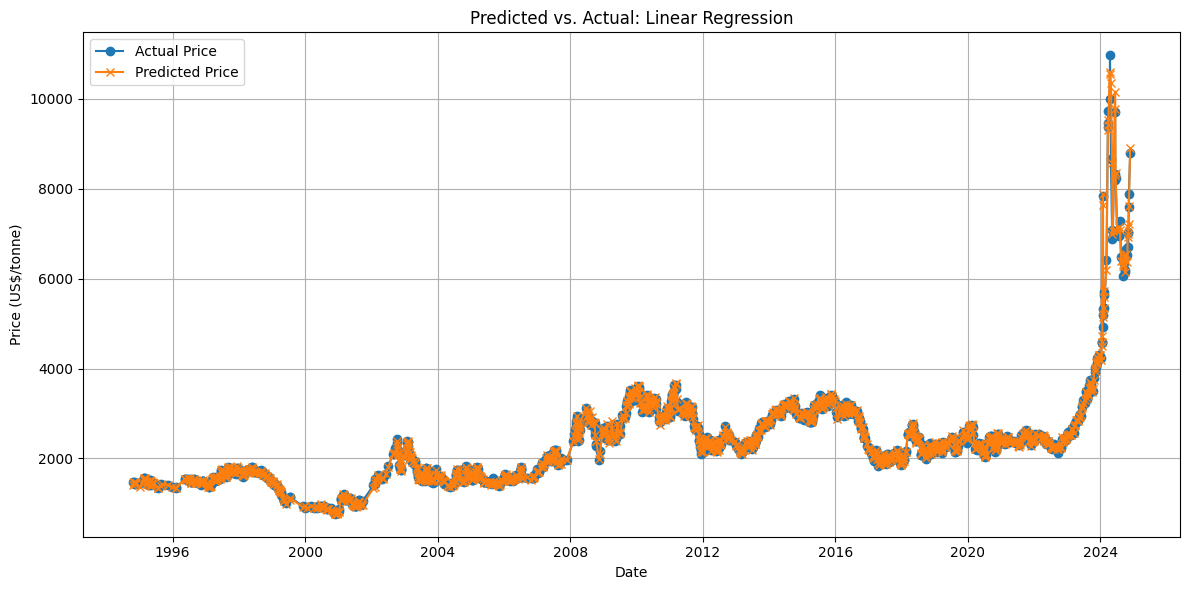

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(test_results_lr['Date'], test_results_lr['Actual'], label='Actual Price', marker='o')
plt.plot(test_results_lr['Date'], test_results_lr['Predicted'], label='Predicted Price', marker='x')
plt.title("Predicted vs. Actual: Linear Regression")
plt.xlabel("Date")
plt.ylabel("Price (US$/tonne)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Predicted vs. Actual: Linear Regression.png')
plt.show()

In [24]:
xgb_model = xgb.XGBRegressor(n_estimators = 150, random_state = 42)
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [25]:
y_pred_3 = xgb_model.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_3)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_3)
print(mse_xgb, rmse_xgb, r2_xgb)

16852.118714410502 129.81571058392933 0.9866783434310751


In [26]:
test_results_xgb = x_test.copy()
test_results_xgb['Actual'] = y_test
test_results_xgb['Predicted'] = y_pred_3
test_results_xgb['Date'] = final_data.loc[test_results_xgb.index, 'Date']
test_results_xgb = test_results_lr.sort_values('Date')

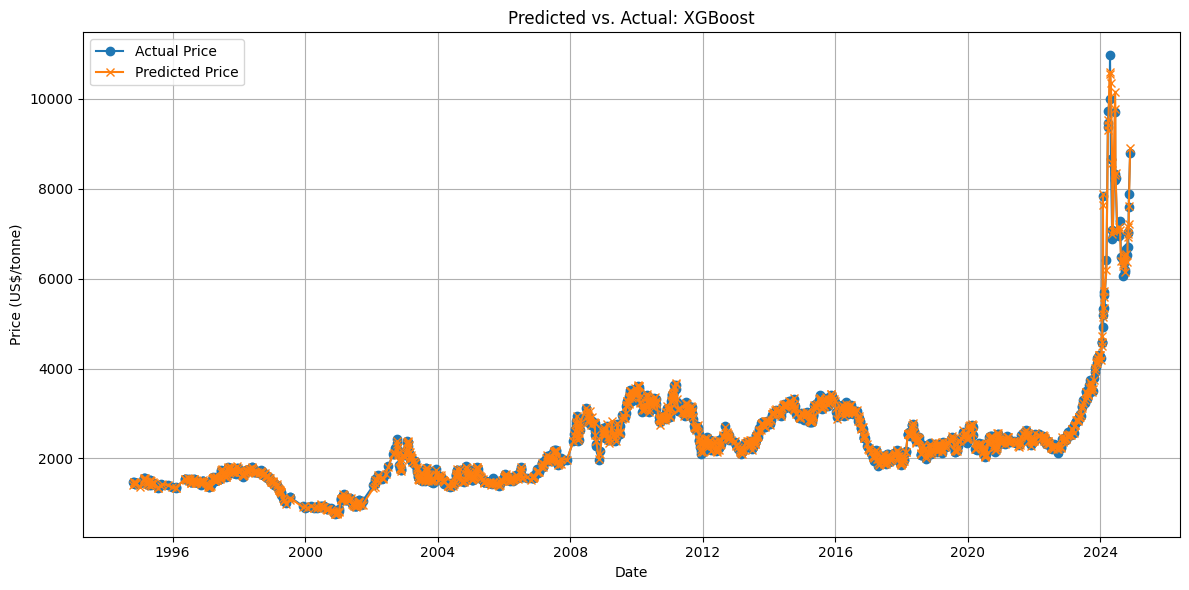

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(test_results_xgb['Date'], test_results_xgb['Actual'], label='Actual Price', marker='o')
plt.plot(test_results_xgb['Date'], test_results_xgb['Predicted'], label='Predicted Price', marker='x')
plt.title("Predicted vs. Actual: XGBoost")
plt.xlabel("Date")
plt.ylabel("Price (US$/tonne)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Predicted vs. Actual: XGBoost.png')
plt.show()

In [28]:
feature_importance = pd.DataFrame({'Feature': x_test.columns,'Importance': xgb_model.feature_importances_})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)
feature_importance

,Feature,Importance
4,Price_yesterday,0.944412
5,Price_2_days_ago,0.052171
2,TMAX,0.000993
3,TMIN,0.000902
1,TAVG,0.000768
0,PRCP,0.000755


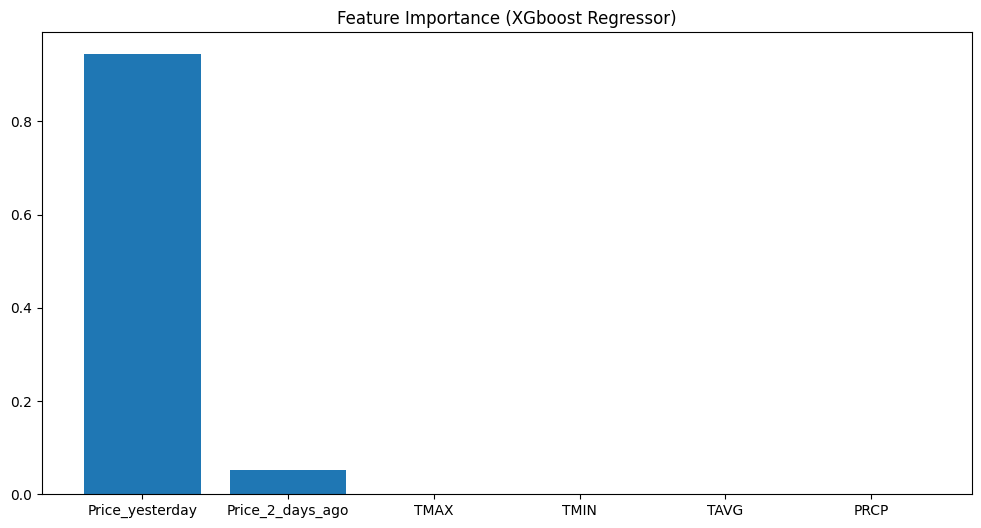

In [29]:
plt.figure(figsize = (12,6))
plt.bar(x=feature_importance['Feature'], height=feature_importance['Importance'])
plt.title('Feature Importance (XGboost Regressor)')
plt.savefig('Feature Importance (XGboost Regressor).png')
plt.show()

In [30]:
model_summary = pd.DataFrame({'Model': ['Random Forest', 'Linear Regression', 'XGBoost'],
                                  'RMSE':[rf_rmse,rmse_linear, rmse_xgb],
                                  'R-squared': [r2_random_forest,r2_linear, r2_xgb]})
model_summary

,Model,RMSE,R-squared
0,Random Forest,144.748524,0.983437
1,Linear Regression,124.179066,0.987810
2,XGBoost,129.815711,0.986678
